# Basics of image processing in Python

There are several libraries you may use to work with image data in Python, e.g:

- [pillow](https://pillow.readthedocs.io/en/stable/) - basic Python image processing, with no scientific focus
- [opencv](https://opencv.org/) - a mature C++ library with Python bindings, with
focus on computer vision.
- [scikit-image](https://scikit-image.org/) - a collection of algorithms
for (scientific) image processing.

In this material, we will play a bit with the last one, as it is easy to install,
it looks most "Pythonic" while being powerful enough. Your preference or
requirements may lead you to opencv as well. However, the concepts should be similar.

In [1]:
%pip install scikit-image

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Image data

In `scikit-image`, image data are numpy arrays. They can be 2D (for grayscale images) or 3D (for colour images, the last
coordinate consists of three channels). Or even 4D, 5D, ... where the "surplus" dimensions (from the left) are slices
(in times, space, ...).

You can create the array yourself or use the [`skimage.io.imread`](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread) function:

In [2]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

image_data = skimage.io.imread("spots.jpg")
print(image_data.shape)
print(image_data.dtype)

(432, 768, 3)
uint8


Btw. the fastest way to display an image is using the [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function:

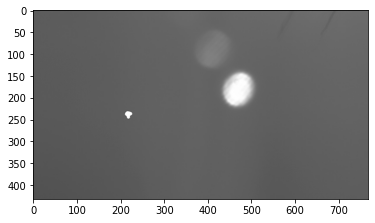

In [3]:
plt.imshow(image_data)

Note that the coordinates go in the `(row, column)` order (from top-left).

Having the pixel values in an array, you can manipulate with them directly (and easily):

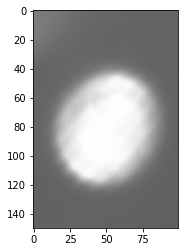

In [4]:
# Select part of an image
plt.imshow(
    image_data[100:250, 420:520]
)

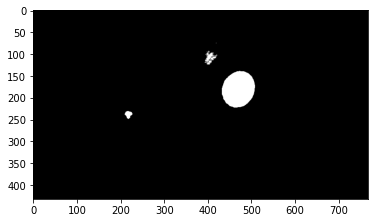

In [5]:
# Simple contrast maximization
high_contrast = image_data.copy()

# Make darker spots black
high_contrast[image_data < 127] = 0

# Make lighter spots white
high_contrast[image_data > 127] = 255

plt.imshow(high_contrast)

In a colour image, the channels can be manipulated separately:

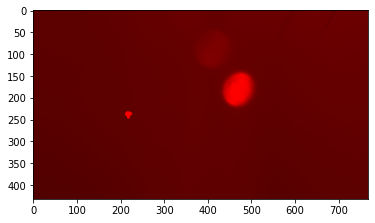

In [6]:
# Set the green (1) and blue (2) component to zero
reddish = np.array([1, 0, 0]) * image_data

plt.imshow(reddish)

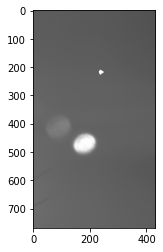

In [7]:
rotated = np.swapaxes(image_data, 0, 1)

plt.imshow(rotated)


### Data dtypes

Image data for scikit-image can have multiple dtypes:
- signed or unsigned integers of 8, 16 or 32 bits (spanning the whole range)
- floats (spanning -1 to 1 or 0 to 1)

Various functions of the library support different dtypes so it is sometimes necessary to do conversions. Please, do not
use mathematical formulas or NumPy's `astype` method to achieve this. There are dedicated functions (`skimage.util.img_as_***`) to do so:

In [8]:
from skimage.util import img_as_float

float_data = img_as_float(image_data)
float_data

array([[[0.34901961, 0.34901961, 0.34901961],
        [0.36078431, 0.36078431, 0.36078431],
        [0.35686275, 0.35686275, 0.35686275],
        ...,
        [0.42352941, 0.42352941, 0.42352941],
        [0.42352941, 0.42352941, 0.42352941],
        [0.42352941, 0.42352941, 0.42352941]],

       [[0.34901961, 0.34901961, 0.34901961],
        [0.36078431, 0.36078431, 0.36078431],
        [0.35686275, 0.35686275, 0.35686275],
        ...,
        [0.41960784, 0.41960784, 0.41960784],
        [0.41960784, 0.41960784, 0.41960784],
        [0.41960784, 0.41960784, 0.41960784]],

       [[0.34901961, 0.34901961, 0.34901961],
        [0.36078431, 0.36078431, 0.36078431],
        [0.35686275, 0.35686275, 0.35686275],
        ...,
        [0.41960784, 0.41960784, 0.41960784],
        [0.41960784, 0.41960784, 0.41960784],
        [0.41960784, 0.41960784, 0.41960784]],

       ...,

       [[0.30980392, 0.30980392, 0.30980392],
        [0.32156863, 0.32156863, 0.32156863],
        [0.31764706, 0

More on that in the [documentation](https://scikit-image.org/docs/stable/user_guide/data_types.html).

## Simple manipulations



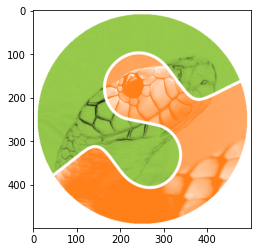

In [9]:
from skimage import data

logo = data.logo()

plt.imshow(logo)

### Conversion from colour to BW



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  if __name__ == '__main__':


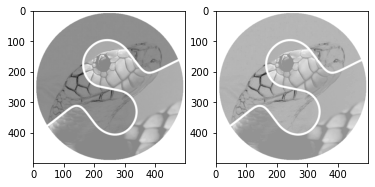

In [10]:
from skimage.color import rgb2gray

fig, ax = plt.subplots(1, 2)

# Naive averaging over channels
ax[0].imshow(logo.mean(axis=2), cmap="gray")

# Proper weighted averaging based on human perception
ax[1].imshow(rgb2gray(logo), cmap="gray")

### Adjusting contrast

/usr/local/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


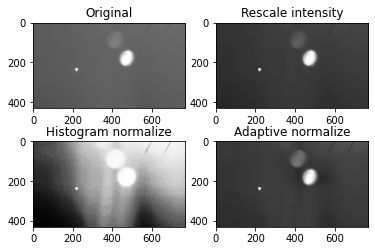

In [11]:
from skimage import exposure

# Stretch the range of brightness over the whole range (0 to 255)
high_contrast = exposure.rescale_intensity(image_data)

# Use histogram equalization
equalized = exposure.equalize_hist(image_data)

# Use adaptive histogram equalization
adaptive = exposure.equalize_adapthist(image_data)

fig, ax = plt.subplots(2, 2)

ax[0][0].imshow(image_data)
ax[0][0].set_title("Original")

ax[0][1].imshow(high_contrast)
ax[0][1].set_title("Rescale intensity")

ax[1][0].imshow(equalized)
ax[1][0].set_title("Histogram normalize")

ax[1][1].imshow(adaptive)
ax[1][1].set_title("Adaptive normalize");

### Rescaling

https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html


(43, 77, 3)

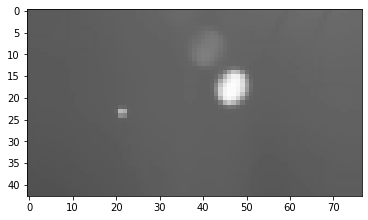

In [20]:
from skimage.transform import rescale

rescaled = rescale(
    image_data,
    0.1,
    anti_aliasing=True,  # To have "smooth" downsampling
    multichannel=True    # Necessary to preserve colour information
)
plt.imshow(rescaled)

rescaled.shape

### Rotation & other transformations

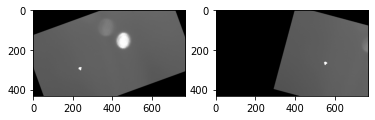

In [25]:
from skimage import transform

fig, ax = plt.subplots(1, 2)

# Rotation only
ax[0].imshow(
    transform.rotate(image_data, 20)
)

# Full Euclidean transformation
ax[1].imshow(
    transform.warp(
        image_data,
        transform.EuclideanTransform(
            rotation=np.pi / 12.,
            translation=(400, -20)
        ).inverse
    )
)

## Advanced example: finding the spots automatically

Adapted from:

- https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html
- https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_label.html

In [48]:
import math

import matplotlib.patches as mpatches

from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

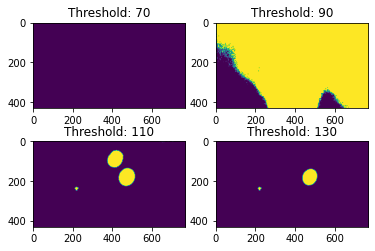

In [53]:
image = image_data[:,:,0]

THRESHOLD = 111

fig, ax = plt.subplots(2, 2)

thresholds = [[70, 90], [110, 130]]

for i in range(2):
    for j in range(2):
        binary = closing(image > thresholds[i][j], square(2))
        ax[i][j].imshow(binary)
        ax[i][j].set_title(f"Threshold: {thresholds[i][j]}")



In [70]:
binary = closing(image > 110, square(5))

# remove artifacts connected to image border
cleared = clear_border(binary)

# label image regions
label_image = label(cleared)
label_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

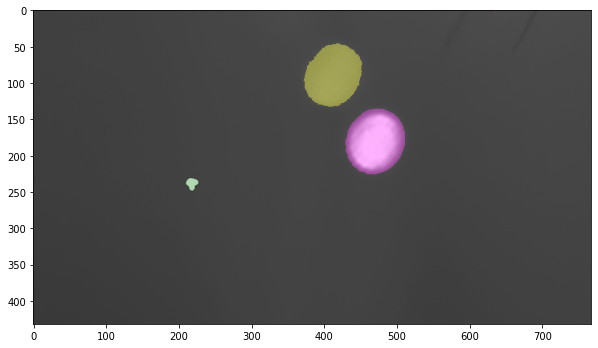

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))

image_label_overlay = label2rgb(label_image, image=image, bg_label=0)
ax.imshow(image_label_overlay)

Found 5 regions.


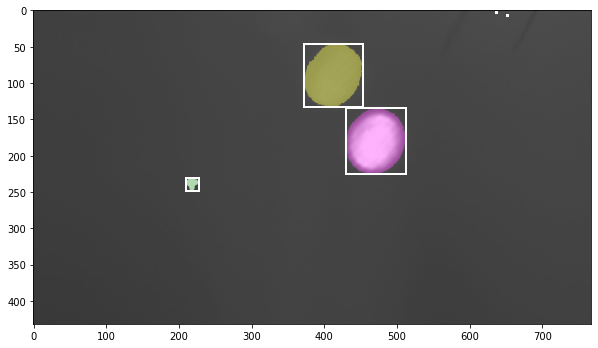

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image_label_overlay)

regions = regionprops(label_image)

print(f"Found {len(regions)} regions.")

for region in regions:
    # Draw rectangle around segmented spots
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='white', linewidth=2)
    ax.add_patch(rect)

3 regions large enough.


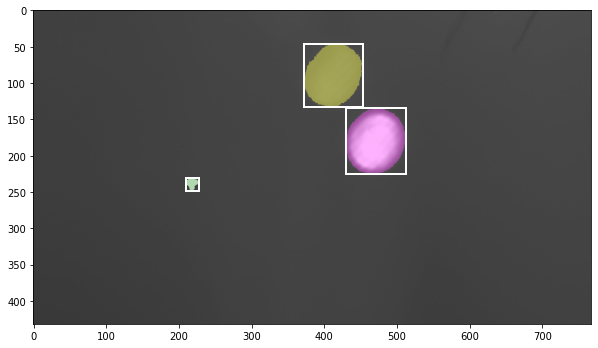

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image_label_overlay)

regions = [region for region in regionprops(label_image) if region.area > 100]

print(f"{len(regions)} regions large enough.")

for region in regions:
    # Draw rectangle around segmented spots
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='white', linewidth=2)
    ax.add_patch(rect)

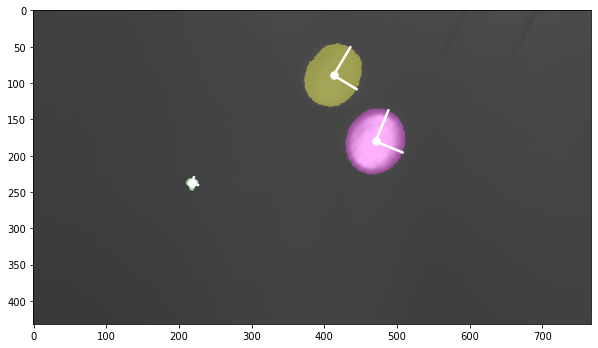

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image_label_overlay)

for region in regions:
    y0, x0 = region.centroid
    orientation = region.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * region.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * region.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * region.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * region.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-w', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-w', linewidth=2.5)
    ax.plot(x0, y0, '.w', markersize=15)

    minr, minc, maxr, maxc = region.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    #ax.plot(bx, by, '-b', linewidth=2.5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77a5caea-ff40-471d-8b4b-98dc66dd30c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>